In [46]:
# imports 
import cv2, os, random, importlib, numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

os.chdir('../lib')

# import custom scripts 
import preprocess_images
import get_bounding_box

# reload and declare functions 
importlib.reload(preprocess_images)
importlib.reload(get_bounding_box)

from preprocess_images import preprocess_grayscale, preprocess_rgb, preprocess_rgbd
from get_bounding_box import get_bounding_box, get_bounding_box_circumscribed, get_bounding_box_new, get_bounding_box_og

In [5]:
train_images, train_masks, val_images, val_masks, test_images, test_masks = preprocess_rgb('../data/useable_data', 70, 15, 15)

Number of Images: 274

Number of Train Images: 191
Number of Val Images: 41
Number of Test Images: 42


Text(0.5, 1.0, 'New Bbox')

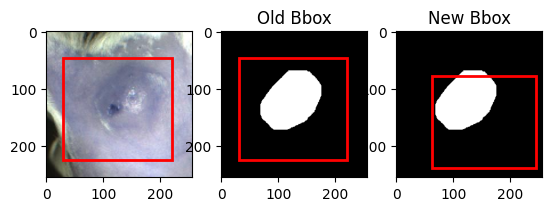

In [52]:
idx = random.randint(0, len(train_images))

fig, ax = plt.subplots(1,3)

bbox_old = get_bounding_box_og(train_masks[idx])
bbox_new = get_bounding_box_new(train_masks[idx]) 

rect_image = patches.Rectangle((bbox_old[0], bbox_old[1]), bbox_old[2], bbox_old[3], linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect_image)

rect_old = patches.Rectangle((bbox_old[0], bbox_old[1]), bbox_old[2], bbox_old[3], linewidth=2, edgecolor='r', facecolor='none')
ax[1].add_patch(rect_old)

rect_new = patches.Rectangle((bbox_new[0], bbox_new[1]), bbox_new[2], bbox_new[3], linewidth=2, edgecolor='r', facecolor='none')
ax[2].add_patch(rect_new)

ax[0].imshow(train_images[idx])
ax[1].imshow(train_masks[idx], cmap="gray")
ax[1].set_title("Old Bbox")
ax[2].imshow(train_masks[idx], cmap="gray")
ax[2].set_title("New Bbox")